# Basic Uniswap Simulation
* [Medium Article: How to Simulate a Liquidity Pool for Decentralized Finance](https://medium.com/@icmoore/simulating-a-liquidity-pool-for-decentralized-finance-6f357ec8564b)
* To download notebook to this tutorial, see [here](https://github.com/defipy-devs/uniswappy/blob/main/notebooks/medium_articles/simple_simulation.ipynb) 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc
import datetime

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from uniswappy import *

In [3]:
n_steps = 5000
start_price = 0.1
mu = 0.3; sigma = 0.5
n_paths = 25

b = BrownianModel(start_price)
p_arr = b.gen_gbms(mu, sigma, n_steps, n_paths)
exp_p_arr = np.median(p_arr, axis = 1)

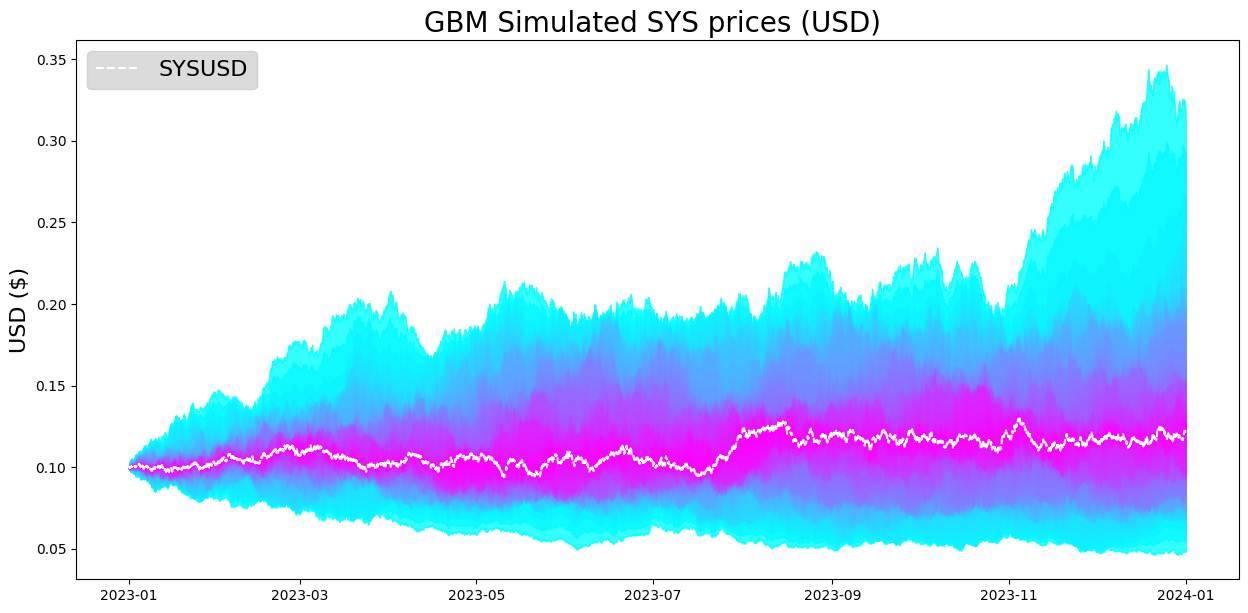

In [5]:
t_deltas = np.linspace(0, 365, num=n_steps+1)
start = datetime.datetime(2023, 1, 1, 0, 0, 0)
date_times = np.array([start + datetime.timedelta(days=t_delta) for t_delta in t_deltas])  

fig = plt.figure(figsize=(15, 7))
USD_ax = fig.gca()

pymc.gp.util.plot_gp_dist( 
    ax=USD_ax,
    x=date_times,
    samples=p_arr.transpose(),
    palette='cool',
    plot_samples=False
)

USD_ax.plot(date_times, exp_p_arr, color = 'white',linestyle = 'dashed', label='SYSUSD') 
USD_ax.set_title("GBM Simulated SYS prices (USD) ", fontsize=20)
USD_ax.set_ylabel("USD ($)", fontsize=16)
USD_ax.legend(fontsize=16, facecolor="lightgray", loc='upper left')

In [6]:
sys_arr = np.zeros((n_steps, n_paths), np.float64)
x_amt_arr = np.zeros((n_steps, n_paths), np.float64)
y_amt_arr = np.zeros((n_steps, n_paths), np.float64)

for k in range(n_paths):
    print(f'Trial run {k}')
    p_trial_arr = p_arr[:,k]
    
    tkn = ERC20('TKN', "0x09")
    dai = ERC20('DAI', "0x111")
    
    lp_sim = SimpleLPSimulation()
    lp_sim.init_amts(10000, p_trial_arr[0])
    lp_sim.create_lp(tkn, dai)
    lp_sim.run(p_trial_arr)
    
    sys_arr[:,k] = lp_sim.get_tkn_price_sim()
    x_amt_arr[:,k] = lp_sim.get_x_amt_sim()
    y_amt_arr[:,k] = lp_sim.get_y_amt_sim()

Trial run 0
Trial run 1
Trial run 2
Trial run 3
Trial run 4
Trial run 5
Trial run 6
Trial run 7
Trial run 8
Trial run 9
Trial run 10
Trial run 11
Trial run 12
Trial run 13
Trial run 14
Trial run 15
Trial run 16
Trial run 17
Trial run 18
Trial run 19
Trial run 20
Trial run 21
Trial run 22
Trial run 23
Trial run 24


Text(0, 0.5, 'DAI')

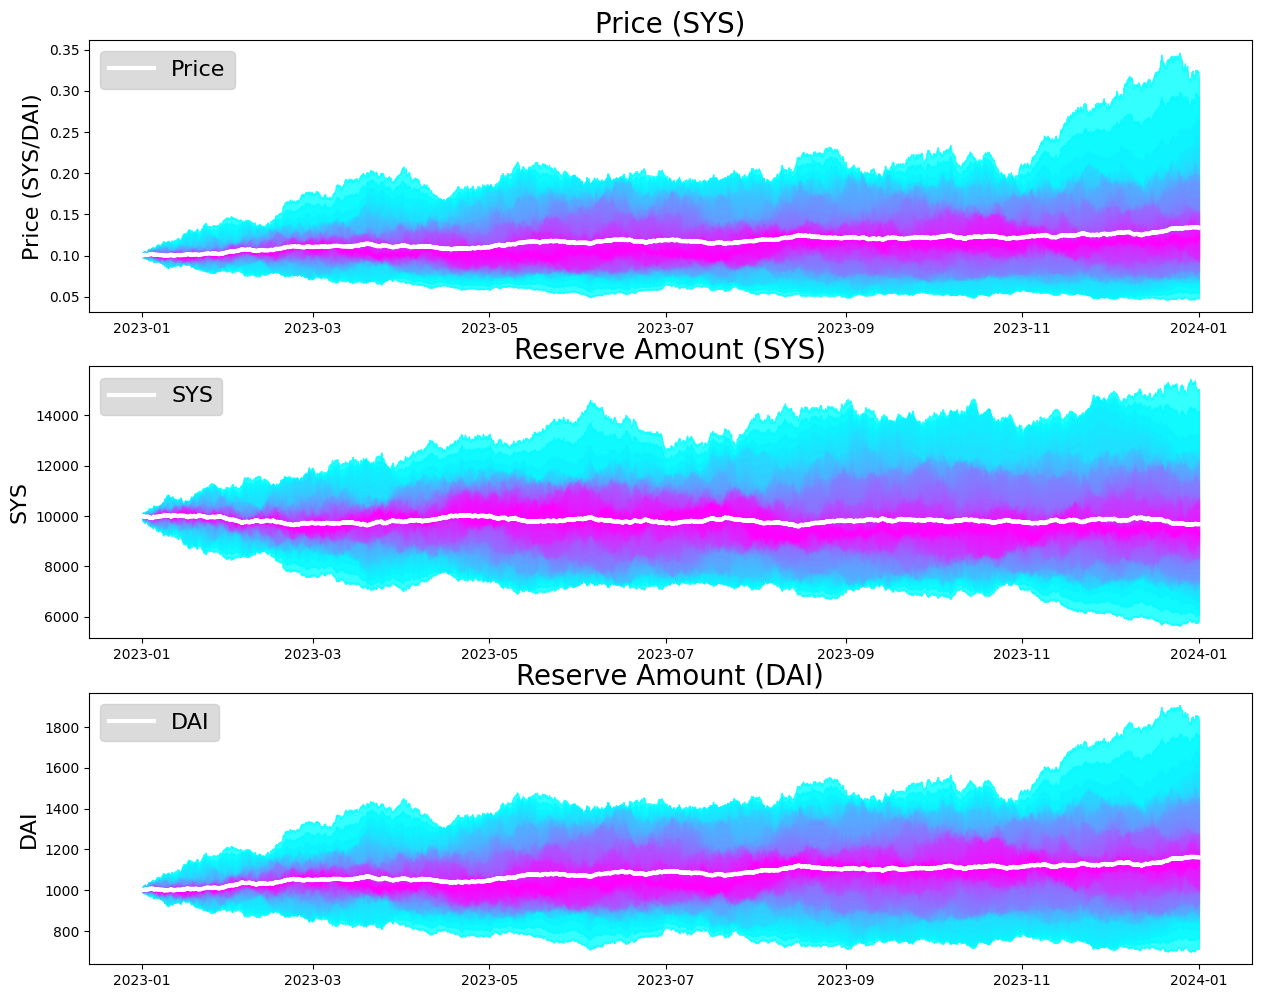

In [7]:
fig, (P_ax, SYS_ax, DAI_ax) = plt.subplots(nrows=3, sharex=False, sharey=False, figsize=(15, 12))

pymc.gp.util.plot_gp_dist( 
    ax=P_ax,
    x=date_times[1:],
    samples=sys_arr.transpose(),
    palette='cool',
    plot_samples=False
)
P_ax.plot(date_times[1:], np.mean(sys_arr, axis = 1), color = 'w', linewidth=3, label='Price')
P_ax.set_title("Price (SYS)", fontsize=20)
P_ax.legend(fontsize=16, facecolor="lightgray", loc='upper left')
P_ax.set_ylabel("Price (SYS/DAI)", fontsize=16)

pymc.gp.util.plot_gp_dist( 
    ax=SYS_ax,
    x=date_times[1:],
    samples=x_amt_arr.transpose(),
    palette='cool',
    plot_samples=False
)
SYS_ax.plot(date_times[1:], np.mean(x_amt_arr, axis = 1), color = 'w', linewidth=3, label='SYS')
SYS_ax.set_title("Reserve Amount (SYS)", fontsize=20)
SYS_ax.legend(fontsize=16, facecolor="lightgray", loc='upper left')
SYS_ax.set_ylabel("SYS", fontsize=16)

pymc.gp.util.plot_gp_dist( 
    ax=DAI_ax,
    x=date_times[1:],
    samples=y_amt_arr.transpose(),
    palette='cool',
    plot_samples=False
)
DAI_ax.plot(date_times[1:], np.mean(y_amt_arr, axis = 1), color = 'w', linewidth=3, label='DAI')
DAI_ax.set_title("Reserve Amount (DAI)", fontsize=20)
DAI_ax.legend(fontsize=16, facecolor="lightgray", loc='upper left')
DAI_ax.set_ylabel("DAI", fontsize=16)